In [494]:
import numpy as np
import scipy as sp
from scipy.stats import uniform
from scipy.stats import gamma
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

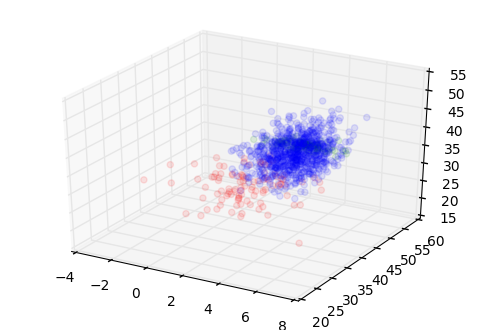

In [744]:
#age, income, education
mu_1 = [3.8, 44.5, 36.5, 38.5 * 7, 23, 50000, 4]
mu_1a = [4, 45.5, 38.5, 41.5 * 7, 28, 67000, 6]
mu_2 = [1.8, 39.5, 28.5, 29.9 * 7, 21, 48000, 3]
Sigma_1 = [[1.,     0.9,   0.9,  0.9,  -0.001, 0.001, 0.001], 
           [0.9,    9.5,   2.5,  1.38, -0.001, 0.001, 0.001], 
           [0.9,    2.5,   15.5, 0.88, -0.001, 0.001, 0.001], 
           [0.9,    1.38,  0.88, 15,   -0.001, 0.001, 0.001],#
           [-0.001, -0.001, -0.001, -0.001,  8., 0.8, 0.01],
           [0.001,  0.001,  0.001, 0.001,   0.8, 7000, 2.],
           [0.001,  0.001,  0.001, 0.001,   0.01, 2., 1.],
          ]

Sigma_1a = [[1., 0.09, 0.09, 0.09, 0.001, 0.001, 0.001], 
           [0.09, 0.95, 0.25, 0.138, 0.001, 0.001, 0.001], 
           [0.09, 0.25, 0.155, 0.088, 0.001, 0.001, 0.001], 
           [0.09, 0.138, 0.088, 7, 0.001, 0.001, 0.001],
           [0.001, 0.001, 0.001, 0.001, 4., 1.5, 1.],
           [0.001, 0.001, 0.001, 0.001, 1.5, 5000, 1.6],
           [0.001, 0.001, 0.001, 0.001, 1.1, 1.6, 1.5],]

Sigma_2 = [[3.5, 0.04, 0.05, 0.08, 0.001, 0.001, 0.001], 
           [0.04, 15., 1.7, 1.18, 0.001, 0.001, 0.001], 
           [0.05, 1.7, 10., 0.92, 0.001, 0.001, 0.001], 
           [0.08, 1.18, 0.92, 5. * 7 + 5., 0.001, 0.001, 0.001],
           [0.001, 0.001, 0.001, 0.001, 6., 0.2, 0.01],
           [0.001, 0.001, 0.001, 0.001, 0.2, 5000, 0.1],
           [0.001, 0.001, 0.001, 0.001, 0.01, 0.1, 2.]]
cl_1 = np.random.multivariate_normal(mu_1, Sigma_1, size = 800)
cl_2 = np.random.multivariate_normal(mu_2, Sigma_2, size = 100)
cl_1a = np.random.multivariate_normal(mu_1a, Sigma_1a, size = 100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cl_1[:, 0], cl_1[:, 1], cl_1[:, 2], color='b', alpha=0.1)
ax.scatter(cl_2[:, 0], cl_2[:, 1], cl_2[:, 2], color='r', alpha=0.1)
ax.scatter(cl_1a[:, 0], cl_1a[:, 1], cl_1a[:, 2], color='g', alpha=0.1)
plt.show()

In [745]:
data = np.vstack((cl_2, cl_1, cl_1a))
data.shape

(1000, 7)

In [746]:
df = pd.DataFrame(data, columns=['weight', 'length', 'head circumference', 'gestation age', 'mothers age', 'mothers income', 'mothers years of post-2nd edu'])
round_to_int = lambda x: np.round(x, 0)
df.loc[:, 'gestation age'] = df['gestation age'].apply(round_to_int)
df.loc[:, 'mothers age'] = df['mothers age'].apply(round_to_int)
df.loc[:, 'mothers years of post-2nd edu'] = df['mothers years of post-2nd edu'].apply(round_to_int)
df = df[(df['weight'] > 1.) & (df['length'] > 10.) & (df['head circumference'] > 10.)]
df.head()

,weight,length,head circumference,gestation age,mothers age,mothers income,mothers years of post-2nd edu
0,3.751827,35.958024,23.728551,207.0,23.0,47864.561782,3.0
2,1.523259,36.503762,27.715082,215.0,19.0,48096.864353,3.0
4,2.016884,37.521100,32.446290,203.0,24.0,48140.197884,1.0
6,2.272493,40.656632,26.480958,206.0,24.0,48011.026817,-1.0
7,5.494735,34.060959,29.304013,214.0,22.0,47973.662421,5.0


In [747]:
len(df)

970

In [748]:
df.to_csv('birth_data_train.csv', sep=',')

In [749]:
prem = lambda x: 0 if x / 7 > 36. else 1
df.loc[:, 'gestation age'] = df['gestation age'].apply(prem)

In [750]:
df.tail()

,weight,length,head circumference,gestation age,mothers age,mothers income,mothers years of post-2nd edu
995,3.139019,47.551662,38.829941,0,26.0,67030.872047,5.0
996,4.107008,46.403113,38.378208,0,32.0,66960.033066,9.0
997,3.722216,45.332196,38.556880,0,29.0,67057.953365,7.0
998,3.327532,45.934462,38.805716,0,24.0,67011.160348,5.0
999,3.693041,44.409486,38.091778,0,27.0,66964.253344,6.0


In [751]:
df.head()

,weight,length,head circumference,gestation age,mothers age,mothers income,mothers years of post-2nd edu
0,3.751827,35.958024,23.728551,1,23.0,47864.561782,3.0
2,1.523259,36.503762,27.715082,1,19.0,48096.864353,3.0
4,2.016884,37.521100,32.446290,1,24.0,48140.197884,1.0
6,2.272493,40.656632,26.480958,1,24.0,48011.026817,-1.0
7,5.494735,34.060959,29.304013,1,22.0,47973.662421,5.0


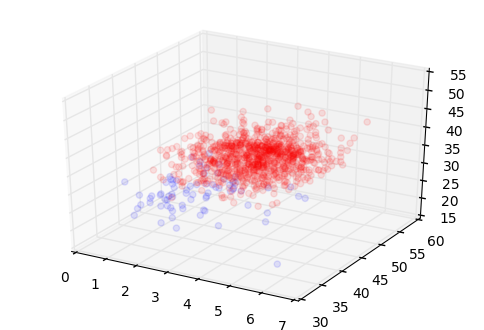

In [752]:
prem_df = df[df['gestation age'] == 1]
reg_df = df[df['gestation age'] == 0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(prem_df['weight'].values, prem_df['length'].values, prem_df['head circumference'].values, color='b', alpha=0.1)
ax.scatter(reg_df['weight'].values, reg_df['length'].values, reg_df['head circumference'].values, color='r', alpha=0.1)


#ax.scatter(cl_2[:, 0], cl_2[:, 1], cl_2[:, 2], color='r', alpha=0.1)
plt.show()

In [754]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df[['weight', 'length', 'head circumference']].values)
diff = ((kmeans.labels_) - df['gestation age'].values)
len(diff[diff != 0]) * 1./ len(df)

0.2958762886597938

done
0
1


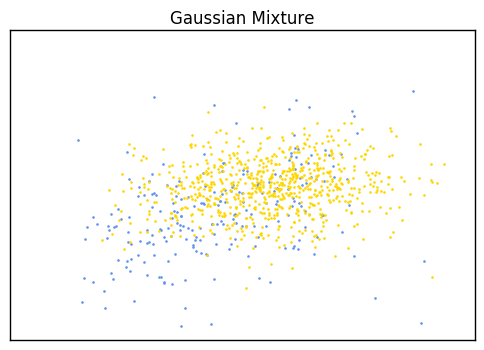

In [755]:
from sklearn.mixture import GaussianMixture
import itertools
from scipy import linalg

color_iter = itertools.cycle(['cornflowerblue', 'gold',
                              'darkorange'])

def plot_results(X, Y_, means, covariances, index, title):
    #splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        print i
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            print i
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

       

    #plt.xlim(-9., 5.)
    #plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    
    plt.title(title)

X = df[['weight', 'length', 'head circumference']].values
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X)
print 'done'

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, 'Gaussian Mixture')
plt.show()

In [757]:
diff = df['gestation age'].values - (1-gmm.predict(X))
print len(diff[diff != 0]) * 1. / len(df)

0.156701030928


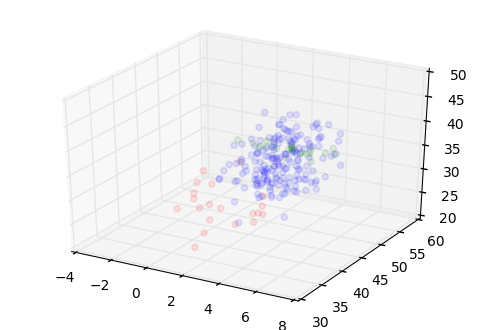

In [783]:
#age, income, education
mu_1 = [3.8, 44.5, 36.5, 38.5 * 7, 23, 50000, 4]
mu_1a = [4, 45.5, 38.5, 41.5 * 7, 28, 67000, 6]
mu_2 = [1.8, 39.5, 28.5, 29.9 * 7, 21, 48000, 3]
Sigma_1 = [[1.,     0.9,   0.9,  0.9,  -0.001, 0.001, 0.001], 
           [0.9,    9.5,   2.5,  1.38, -0.001, 0.001, 0.001], 
           [0.9,    2.5,   15.5, 0.88, -0.001, 0.001, 0.001], 
           [0.9,    1.38,  0.88, 15,   -0.001, 0.001, 0.001],#
           [-0.001, -0.001, -0.001, -0.001,  8., 0.8, 0.01],
           [0.001,  0.001,  0.001, 0.001,   0.8, 7000, 2.],
           [0.001,  0.001,  0.001, 0.001,   0.01, 2., 1.],
          ]

Sigma_1a = [[1., 0.09, 0.09, 0.09, 0.001, 0.001, 0.001], 
           [0.09, 0.95, 0.25, 0.138, 0.001, 0.001, 0.001], 
           [0.09, 0.25, 0.155, 0.088, 0.001, 0.001, 0.001], 
           [0.09, 0.138, 0.088, 7, 0.001, 0.001, 0.001],
           [0.001, 0.001, 0.001, 0.001, 4., 1.5, 1.],
           [0.001, 0.001, 0.001, 0.001, 1.5, 5000, 1.6],
           [0.001, 0.001, 0.001, 0.001, 1.1, 1.6, 1.5],]

Sigma_2 = [[3.5, 0.04, 0.05, 0.08, 0.001, 0.001, 0.001], 
           [0.04, 15., 1.7, 1.18, 0.001, 0.001, 0.001], 
           [0.05, 1.7, 10., 0.92, 0.001, 0.001, 0.001], 
           [0.08, 1.18, 0.92, 5. * 7 + 5., 0.001, 0.001, 0.001],
           [0.001, 0.001, 0.001, 0.001, 6., 0.2, 0.01],
           [0.001, 0.001, 0.001, 0.001, 0.2, 5000, 0.1],
           [0.001, 0.001, 0.001, 0.001, 0.01, 0.1, 2.]]
cl_1 = np.random.multivariate_normal(mu_1, Sigma_1, size = 180)
cl_2 = np.random.multivariate_normal(mu_2, Sigma_2, size = 20)
cl_1a = np.random.multivariate_normal(mu_1a, Sigma_1a, size = 25)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cl_1[:, 0], cl_1[:, 1], cl_1[:, 2], color='b', alpha=0.1)
ax.scatter(cl_2[:, 0], cl_2[:, 1], cl_2[:, 2], color='r', alpha=0.1)
ax.scatter(cl_1a[:, 0], cl_1a[:, 1], cl_1a[:, 2], color='g', alpha=0.1)
plt.show()

In [784]:
X = np.vstack((cl_1, cl_2, cl_1a))
df = pd.DataFrame(X, columns=['weight', 'length', 'head circumference', 'gestation age', 'mothers age', 'mothers income', 'mothers years of post-2nd edu'])
round_to_int = lambda x: np.round(x, 0)
df.loc[:, 'gestation age'] = df['gestation age'].apply(round_to_int)
df.loc[:, 'mothers age'] = df['mothers age'].apply(round_to_int)
df.loc[:, 'mothers years of post-2nd edu'] = df['mothers years of post-2nd edu'].apply(round_to_int)
df = df[(df['weight'] > 1.) & (df['length'] > 10.) & (df['head circumference'] > 10.)]


df.to_csv('birth_data_test.csv', sep=',')

print len(df)
prem = lambda x: 0 if x / 7 > 36. else 1
df.loc[:, 'gestation age'] = df['gestation age'].apply(prem)

X = df[['weight', 'length', 'head circumference']].values

217


In [785]:
diff = ((kmeans.predict(X)) - df['gestation age'].values)
print len(diff[diff != 0]) * 1./ len(df)
diff = df['gestation age'].values - (1-gmm.predict(X))
print len(diff[diff != 0]) * 1. / len(df)

0.350230414747
0.225806451613
